<a href="https://colab.research.google.com/github/N335HMAVA5UD3V/Rice-classification/blob/main/Rice_CNN_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**RICE CLASSIFICATION**

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
from tensorflow import keras
from skimage.io import imread
from skimage.transform import resize
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten
from PIL import Image

# Load dataset


Here I trie to use a dataset directly from kaggle.
First install kaggle.

In [ ]:
!pip install -q kaggle

upload kaggle.json file.

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"neeshmat","key":"10d9ff2e8ee7aa52582ba9175bce82ec"}'}

create a kaggle folder

In [ ]:
! mkdir ~/.kaggle

copy the kaggle.json folder to the directory

In [ ]:
! cp kaggle.json ~/.kaggle/

permission for json to act

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

copy API command of the dataset from kaggle

In [ ]:
!kaggle datasets download -d muratkokludataset/rice-image-dataset

100% 219M/219M [00:07<00:00, 32.8MB/s]
100% 219M/219M [00:08<00:00, 28.7MB/s]


Unzip the dataset

In [ ]:
!unzip rice-image-dataset.zip


Streaming output truncated to the last 5000 lines.
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (55).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (550).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5500).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5501).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5502).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5503).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5504).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5505).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5506).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5507).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5508).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5509).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (551).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5510).jpg  
  inflating: Rice_Image_Dataset/Karacadag/K

In [ ]:
datadir='/content/Rice_Image_Dataset'
folders=list(os.listdir(datadir))
print(folders)

['Jasmine', 'Karacadag', 'Arborio', 'Rice_Citation_Request.txt', 'Basmati', 'Ipsala']


remove unwanted folders

In [ ]:
folders.remove("Rice_Citation_Request.txt")
print(folders)

['Jasmine', 'Karacadag', 'Arborio', 'Basmati', 'Ipsala']


to split the data set into training and testing install split_folder package

In [ ]:
def count_images(path):
    total_count = 0

    for root, dirs, files in os.walk(path):
        total_count += len(files)

    return total_count


my_path = "/content/Rice_Image_Dataset"
image_count = count_images(my_path)

sub_arb="/content/Rice_Image_Dataset/Arborio"
image_count_arb = count_images(sub_arb)

sub_bas="/content/Rice_Image_Dataset/Basmati"
img_count_bas = count_images(sub_bas)

sub_ips="/content/Rice_Image_Dataset/Ipsala"
img_count_ips = count_images(sub_ips)

sub_jas = "/content/Rice_Image_Dataset/Jasmine"
img_count_jas = count_images(sub_jas)

sub_kar = "/content/Rice_Image_Dataset/Karacadag"
img_count_kar = count_images(sub_kar)

print(f"Total number of images in dataset: {image_count}")
print(f"total number of images in Arborio:  {image_count_arb}")
print(f"total number of images in Basmati:  {img_count_bas}")
print(f"total number of images in Ipsala:  {img_count_ips}")
print(f"total number of images in Jasmine:  {img_count_jas}")
print(f"total number of images in Karacadag:  {img_count_kar}")



Total number of images in dataset: 75001
total number of images in Arborio:  15000
total number of images in Basmati:  15000
total number of images in Ipsala:  15000
total number of images in Jasmine:  15000
total number of images in Karacadag:  15000


In [ ]:
pip install split-folders[full]

split the dataset

In [ ]:
import splitfolders
input_folder='/content/Rice_Image_Dataset'
splitfolders.ratio(input_folder,output="split",ratio=(0.7,0.3),group_prefix=None)


Copying files: 75000 files [00:22, 3290.85 files/s]


check the count of images in split folders

In [ ]:
my_path_train = "/content/split/train"
image_count = count_images(my_path_train)

my_path_val = "/content/split/val"
image_count_val = count_images(my_path_val)

sub_arb_train="/content/split/train/Arborio"
image_count_arb_train = count_images(sub_arb_train)

sub_bas_train="/content/split/train/Basmati"
img_count_bas_train = count_images(sub_bas_train)

sub_ips_train="/content/split/train/Ipsala"
img_count_ips_train = count_images(sub_ips_train)

sub_jas_train = "/content/split/train/Jasmine"
img_count_jas_train = count_images(sub_jas_train)

sub_kar_train = "/content/split/train/Karacadag"
img_count_kar_train = count_images(sub_kar_train)

sub_arb_val="/content/split/val/Arborio"
image_count_arb_val = count_images(sub_arb_val)

sub_bas_val ="/content/split/val/Basmati"
img_count_bas_val = count_images(sub_bas_val)

sub_ips_val ="/content/split/val/Ipsala"
img_count_ips_val = count_images(sub_ips_val)

sub_jas_val  = "/content/split/val/Jasmine"
img_count_jas_val = count_images(sub_jas_val)

sub_kar_val = "/content/split/val/Karacadag"
img_count_kar_val = count_images(sub_kar_val)

print(f"Total number of images in train: {image_count}")
print()
print(f"Total number of images in val: {image_count_val}")
print()
print("number of images is test data")
print(f"total number of images in Arborio_train:  {image_count_arb_train}")
print(f"total number of images in Basmati_train:  {img_count_bas_train}")
print(f"total number of images in Ipsala_train:  {img_count_ips_train}")
print(f"total number of images in Jasmine_train:  {img_count_jas_train}")
print(f"total number of images in Karacadag_train:  {img_count_kar_train}")
print()
print("number of images id validation data")
print(f"total number of images in Arborio_val:  {image_count_arb_val}")
print(f"total number of images in Basmati_val:  {img_count_bas_val}")
print(f"total number of images in Ipsala_val:  {img_count_ips_val}")
print(f"total number of images in Jasmine_val:  {img_count_jas_val}")
print(f"total number of images in Karacadag_val:  {img_count_kar_val}")

Total number of images in train: 52500

Total number of images in val: 22500

number of images is test data
total number of images in Arborio_train:  10500
total number of images in Basmati_train:  10500
total number of images in Ipsala_train:  10500
total number of images in Jasmine_train:  10500
total number of images in Karacadag_train:  10500

number of images id validation data
total number of images in Arborio_val:  4500
total number of images in Basmati_val:  4500
total number of images in Ipsala_val:  4500
total number of images in Jasmine_val:  4500
total number of images in Karacadag_val:  4500


In [ ]:
75000*0.7

52500.0

In [ ]:
75000-52500

22500

In [ ]:
datadir_train='/content/split/train'
X_train=[]
y_train=[]
folders=['Basmati','Karacadag','Arborio','Ipsala','Jasmine']
for i in folders:
  print("loading....!",i)
  path=os.path.join(datadir_train,i)
  images=os.listdir(path)
  for img in images:
    img_path=os.path.join(path,img)
    img_arr=imread(img_path)
    img_resized=resize(img_arr,(70,70,1))
    X_train.append(img_resized)
    y_train.append(folders.index(i))
  print("completed...!",i)

loading....! Basmati
completed...! Basmati
loading....! Karacadag
completed...! Karacadag
loading....! Arborio
completed...! Arborio
loading....! Ipsala
completed...! Ipsala
loading....! Jasmine
completed...! Jasmine


In [ ]:
img_arr.shape

(250, 250, 3)

In [ ]:
img_resized.shape

(70, 70, 1)

In [ ]:
datadir_test='/content/split/val'
X_test=[]
y_test=[]
folders=['Basmati','Karacadag','Arborio','Ipsala','Jasmine']
for i in folders:
  print("loading....!",i)
  path=os.path.join(datadir_test,i)
  images=os.listdir(path)
  for img in images:
    img_path=os.path.join(path,img)
    img_arr=imread(img_path)
    img_resized=resize(img_arr,(70,70,1))
    X_test.append(img_resized)
    y_test.append(folders.index(i))
  print("completed...!",i)

loading....! Basmati
completed...! Basmati
loading....! Karacadag
completed...! Karacadag
loading....! Arborio
completed...! Arborio
loading....! Ipsala
completed...! Ipsala
loading....! Jasmine
completed...! Jasmine


In [ ]:
img_arr.shape

(250, 250, 3)

In [ ]:
img_resized.shape

(70, 70, 1)

In [ ]:
X_train=np.array(X_train)
X_test=np.array(X_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

In [ ]:
X_train.shape

(52500, 70, 70, 1)

In [ ]:
y_train.shape

(52500,)

In [ ]:
X_test.shape

(22500, 70, 70, 1)

In [ ]:
y_test.shape

(22500,)

In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(70,70,1),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dense(5,activation='softmax'))

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(X_train,y_train,epochs=50,batch_size=500)

Epoch 1/50
105/105 [==============================] - 267s 3s/step - loss: 0.3322 - accuracy: 0.8833
Epoch 2/50
105/105 [==============================] - 261s 2s/step - loss: 0.1015 - accuracy: 0.9648
Epoch 3/50
105/105 [==============================] - 267s 3s/step - loss: 0.0862 - accuracy: 0.9708
Epoch 4/50
105/105 [==============================] - 262s 2s/step - loss: 0.0750 - accuracy: 0.9743
Epoch 5/50
105/105 [==============================] - 262s 2s/step - loss: 0.0730 - accuracy: 0.9750
Epoch 6/50
105/105 [==============================] - 260s 2s/step - loss: 0.0664 - accuracy: 0.9769
Epoch 7/50
105/105 [==============================] - 255s 2s/step - loss: 0.0673 - accuracy: 0.9764
Epoch 8/50
105/105 [==============================] - 252s 2s/step - loss: 0.0615 - accuracy: 0.9787
Epoch 9/50
105/105 [==============================] - 252s 2s/step - loss: 0.0574 - accuracy: 0.9807
Epoch 10/50
105/105 [==============================] - 254s 2s/step - loss: 0.0589 - accura

In [ ]:
loss,accuracy=model.evaluate(X_test,y_test)
print("Loss:",loss)
print("Accuracy:",accuracy)

704/704 [==============================] - 32s 44ms/step - loss: 0.0385 - accuracy: 0.9884
Loss: 0.03847157582640648
Accuracy: 0.9883555769920349


In [ ]:
model1 = model.save('my_model1.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
#import pickle

In [ ]:
#dum=pickle.dump(model,open('modelcnn.sav','wb'))

In [ ]:
# m=pickle.load(open('/content/drive/MyDrive/models/modelcnn.sav','rb'))

In [ ]:
import cv2

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
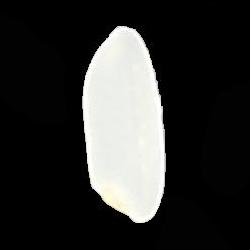

In [ ]:
img=imread('/content/Rice_Image_Dataset/Ipsala/Ipsala (10048).jpg')
img

In [ ]:
img=resize(img,(70,70,1))
img=img.reshape(1,70,70,1)
pred=model1.predict(img)
ind=pred.argmax(axis=1)
folders[ind.item()]

1/1 [==============================] - 0s 178ms/step


'Ipsala'